In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# --- 1. CẤU HÌNH DATABASE ---
DB_CONFIG = {
    "dbname": "booking_data",
    "user": "postgres",
    "password": "123456",
    "host": "localhost",
    "port": "5432"
}

DB_CONNECTION_STR = f"postgresql+psycopg2://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['dbname']}"
engine = create_engine(DB_CONNECTION_STR)

TABLE_NAMES = ["clean_booking_balanced", "clean_ivivu_balanced", "clean_mytour_balanced"]

# --- 2. ĐỌC DỮ LIỆU TỪ DATABASE ---
dfs = []
for table in TABLE_NAMES:
    try:
        temp_df = pd.read_sql(f"SELECT * FROM {table}", engine)
        # Thêm cột nguồn để biết dòng nào từ bảng nào (tùy chọn)
        # temp_df['original_table'] = table 
        dfs.append(temp_df)
        print(f"Đã tải dữ liệu từ bảng: {table} ({len(temp_df)} dòng)")
    except Exception as e:
        print(f"Lỗi khi đọc bảng {table}: {e}")

# --- 3. GỘP DỮ LIỆU VÀ XUẤT CSV ---
if dfs:
    # Gộp tất cả các bảng
    df_final = pd.concat(dfs, ignore_index=True)
    print(f"\n[INFO] Tổng cộng đã gộp: {len(df_final)} dòng dữ liệu.")

    # Tên file muốn xuất
    output_filename = "../data/merged_hotel_data.csv"

    # Xuất file CSV
    # index=False: Không lưu cột số thứ tự của pandas vào file
    # encoding='utf-8-sig': Hỗ trợ hiển thị tiếng Việt chuẩn trên Excel
    df_final.to_csv(output_filename, index=False, encoding='utf-8-sig')
    
    print(f"[SUCCESS] Đã lưu file thành công tại: {output_filename}")
else:
    print("[ERROR] Không có dữ liệu để gộp và xuất file.")

Đã tải dữ liệu từ bảng: clean_booking_balanced (8871 dòng)
Đã tải dữ liệu từ bảng: clean_ivivu_balanced (2780 dòng)
Đã tải dữ liệu từ bảng: clean_mytour_balanced (683 dòng)

[INFO] Tổng cộng đã gộp: 12334 dòng dữ liệu.
[SUCCESS] Đã lưu file thành công tại: ../data/final_merged_booking_data.csv


# Task
Thực hiện phân tích khám phá dữ liệu (EDA) trên tập dữ liệu `merged_data_cleaned_test.csv` bằng cách tạo các biểu đồ boxplot cho `area_m2` và `final_price` (nhóm theo `room_class`), biểu đồ histogram cho `area_m2` và `final_price`, biểu đồ countplot cho `room_class`, và biểu đồ heatmap thể hiện ma trận tương quan giữa các đặc trưng số. Giải thích ý nghĩa của từng biểu đồ, đánh giá miền giá trị, các giá trị ngoại lai, phân phối, thang đo, độ lệch, sự mất cân bằng nhãn và mối quan hệ giữa các biến số. Cuối cùng, tổng hợp tất cả các đánh giá và giải thích về chất lượng dữ liệu để đưa ra kết luận tổng thể về việc bộ dữ liệu có đủ để xây dựng mô hình hay không, tất cả đều bằng tiếng Việt.

## Boxplot area_m2


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

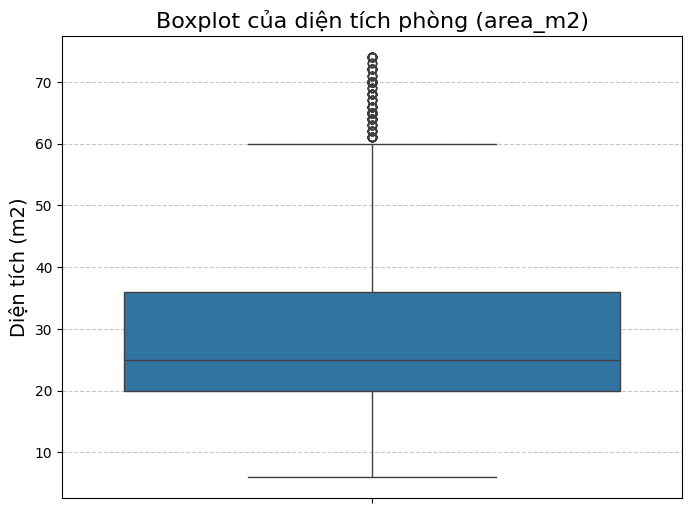

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Area_m2'])
plt.title('Boxplot của diện tích phòng (area_m2)', fontsize=16)
plt.ylabel('Diện tích (m2)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Giải thích Boxplot và Đánh giá `area_m2`

Biểu đồ boxplot (biểu đồ hộp và râu) hiển thị sự phân bố của dữ liệu `area_m2` thông qua các tứ phân vị và các giá trị ngoại lai.

**Ý nghĩa của biểu đồ Boxplot:**
*   **Đường giữa (median):** Là giá trị trung vị của dữ liệu (Q2), chia dữ liệu thành hai nửa bằng nhau. Khoảng 50% các phòng có diện tích nhỏ hơn hoặc bằng giá trị này, và 50% các phòng có diện tích lớn hơn hoặc bằng giá trị này.
*   **Hộp (box):** Đại diện cho Khoảng Tứ phân vị (IQR - Interquartile Range), tức là khoảng từ tứ phân vị thứ nhất (Q1) đến tứ phân vị thứ ba (Q3). 50% dữ liệu ở giữa nằm trong khoảng này.
    *   **Đáy hộp (Q1):** Tứ phân vị thứ nhất, 25% dữ liệu có giá trị nhỏ hơn hoặc bằng Q1.
    *   **Nắp hộp (Q3):** Tứ phân vị thứ ba, 75% dữ liệu có giá trị nhỏ hơn hoặc bằng Q3.
*   **Râu (whiskers):** Mở rộng từ hộp đến các giá trị lớn nhất và nhỏ nhất trong phạm vi cho phép mà không phải là ngoại lai. Chiều dài râu thường được tính bằng Q1 - 1.5 * IQR và Q3 + 1.5 * IQR.
*   **Dấu chấm (outliers):** Là các điểm dữ liệu nằm ngoài phạm vi của râu, được coi là các giá trị ngoại lai.

**Đánh giá miền giá trị và giá trị ngoại lai của `area_m2`:**
Để đánh giá cụ thể hơn, chúng ta cần xem xét các giá trị thống kê của cột `area_m2`:

*   **Giá trị tối thiểu (Min):** 1.0 m²
*   **Tứ phân vị thứ nhất (Q1):** 20.0 m²
*   **Giá trị trung vị (Median/Q2):** 28.0 m²
*   **Tứ phân vị thứ ba (Q3):** 40.0 m²
*   **Giá trị tối đa (Max):** 240.0 m²
*   **Khoảng Tứ phân vị (IQR):** Q3 - Q1 = 40.0 - 20.0 = 20.0 m²

**Từ biểu đồ và các giá trị thống kê, có thể rút ra các nhận xét sau:**

1.  **Miền giá trị (Domain):**
    *   `area_m2` có miền giá trị rộng, từ 1.0 m² đến 240.0 m². Điều này cho thấy có sự đa dạng lớn về diện tích phòng trong tập dữ liệu.
    *   Đáng chú ý là giá trị tối thiểu 1.0 m² có vẻ không hợp lý cho diện tích một căn phòng thực tế, có thể là một lỗi nhập liệu hoặc một trường hợp đặc biệt.

2.  **Phân bố dữ liệu:**
    *   Phần lớn dữ liệu (50%) nằm trong khoảng từ 20.0 m² đến 40.0 m², với giá trị trung vị là 28.0 m². Điều này cho thấy đa số các phòng có diện tích tương đối nhỏ đến trung bình.
    *   Hộp không đối xứng, và râu phía trên dài hơn râu phía dưới, cho thấy phân bố dữ liệu bị lệch phải (skewed to the right). Tức là có nhiều phòng có diện tích nhỏ hơn, và một số ít phòng có diện tích rất lớn.

3.  **Giá trị ngoại lai (Outliers):**
    *   Theo quy tắc 1.5 * IQR:
        *   Giới hạn dưới cho râu: Q1 - 1.5 * IQR = 20.0 - 1.5 * 20.0 = -10.0 m². (Không có giá trị nào dưới 1.0 m², nên râu dưới sẽ kéo dài đến giá trị nhỏ nhất không phải ngoại lai là 1.0 m²).
        *   Giới hạn trên cho râu: Q3 + 1.5 * IQR = 40.0 + 1.5 * 20.0 = 70.0 m².
    *   Biểu đồ cho thấy có rất nhiều **giá trị ngoại lai ở phía trên** (các dấu chấm phía trên râu). Những giá trị này là các phòng có diện tích lớn hơn 70.0 m². Ví dụ, có những phòng có diện tích lên tới 240.0 m², điều này là khá lớn và cần được xem xét kỹ lưỡng. Các giá trị ngoại lai này có thể là các căn hộ lớn, penthouse, hoặc lỗi dữ liệu.
    *   Sự hiện diện của nhiều giá trị ngoại lai cho thấy cần phải cẩn trọng khi phân tích dữ liệu và có thể cần xử lý chúng (ví dụ: loại bỏ, biến đổi, hoặc phân tích riêng) tùy thuộc vào mục tiêu của mô hình.

## Histogram area_m2



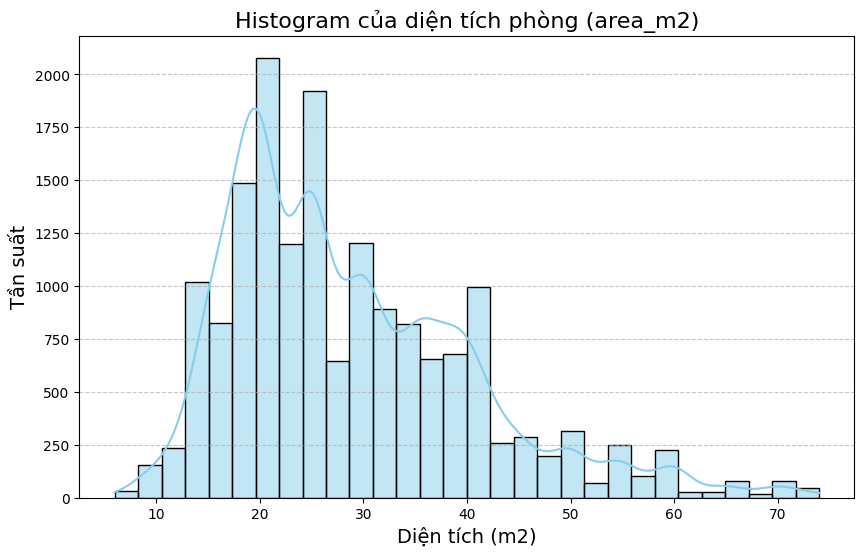

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Area_m2'], kde=True, bins=30, color='skyblue')
plt.title('Histogram của diện tích phòng (area_m2)', fontsize=16)
plt.xlabel('Diện tích (m2)', fontsize=14)
plt.ylabel('Tần suất', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Giải thích Histogram và Đánh giá `area_m2`

Biểu đồ histogram cho cột `area_m2` thể hiện phân phối tần suất của các giá trị diện tích phòng. Trục hoành (x-axis) biểu diễn các khoảng giá trị diện tích (m²), và trục tung (y-axis) biểu diễn tần suất (số lượng phòng) tương ứng với mỗi khoảng giá trị đó. Đường cong KDE (Kernel Density Estimate) chồng lên biểu đồ giúp ước tính mật độ phân phối của dữ liệu.

**Ý nghĩa của biểu đồ Histogram:**
*   **Hình dạng phân phối:** Cho biết cách dữ liệu được phân bổ. Một biểu đồ cân đối (đối xứng) cho thấy dữ liệu phân bố đều quanh giá trị trung tâm. Biểu đồ lệch (skewed) cho thấy dữ liệu tập trung nhiều hơn về một phía.
*   **Các đỉnh (Modes):** Các đỉnh trên biểu đồ cho biết các khoảng giá trị có tần suất xuất hiện cao nhất. Một đỉnh duy nhất cho thấy một phân phối đơn mode (unimodal); nhiều đỉnh cho thấy phân phối đa mode (multimodal).
*   **Khoảng giá trị phổ biến:** Các thanh cao nhất trên histogram chỉ ra các khoảng giá trị mà phần lớn dữ liệu tập trung vào đó.

**Đánh giá phân phối thực tế của `area_m2`:**
Từ biểu đồ histogram của `area_m2`, chúng ta có thể đưa ra các nhận xét sau:

1.  **Hình dạng phân phối:**
    *   Phân phối của `area_m2` rõ ràng là **lệch phải (right-skewed)** hay **lệch dương**. Điều này có nghĩa là phần lớn các phòng có diện tích nhỏ hơn, và có một số lượng nhỏ các phòng có diện tích rất lớn kéo dài đuôi của phân phối về phía bên phải.
    *   Điều này phù hợp với nhận định từ boxplot về các giá trị ngoại lai lớn và râu phía trên dài hơn, cho thấy sự hiện diện của các căn phòng diện tích rất rộng.

2.  **Các đỉnh (Modes):**
    *   Biểu đồ cho thấy một **đỉnh chính (mode)** rõ rệt nằm trong khoảng **từ khoảng 20 m² đến 30 m²**. Điều này chỉ ra rằng diện tích phòng phổ biến nhất trong tập dữ liệu nằm trong khoảng này.
    *   Có thể có một số đỉnh nhỏ hơn hoặc sự phân bố không hoàn toàn trơn tru, nhưng đỉnh chính là rõ ràng nhất.

3.  **Khoảng giá trị phổ biến:**
    *   Phần lớn dữ liệu `area_m2` tập trung mạnh mẽ ở các giá trị nhỏ, đặc biệt là dưới 50 m². Các thanh histogram cao nhất nằm trong khoảng 20-30 m², sau đó giảm dần.
    *   Có một số phòng có diện tích rất lớn, lên đến 200-250 m², nhưng tần suất xuất hiện của chúng rất thấp, điều này tạo ra phần đuôi dài và phẳng của histogram về phía bên phải. Đây chính là những giá trị ngoại lai đã được xác định qua boxplot.

## Histogram final_price

### Subtask:
Tạo biểu đồ histogram cho cột `final_price`. Giải thích ý nghĩa của biểu đồ và đánh giá thang đo (scale) cũng như độ lệch (skew) của phân phối `final_price` bằng tiếng Việt.


**Reasoning**:
I will create a histogram for the `final_price` column to visualize its distribution, as per the subtask instructions. I'll use `seaborn.histplot` with KDE and `matplotlib.pyplot` to set the title and labels.



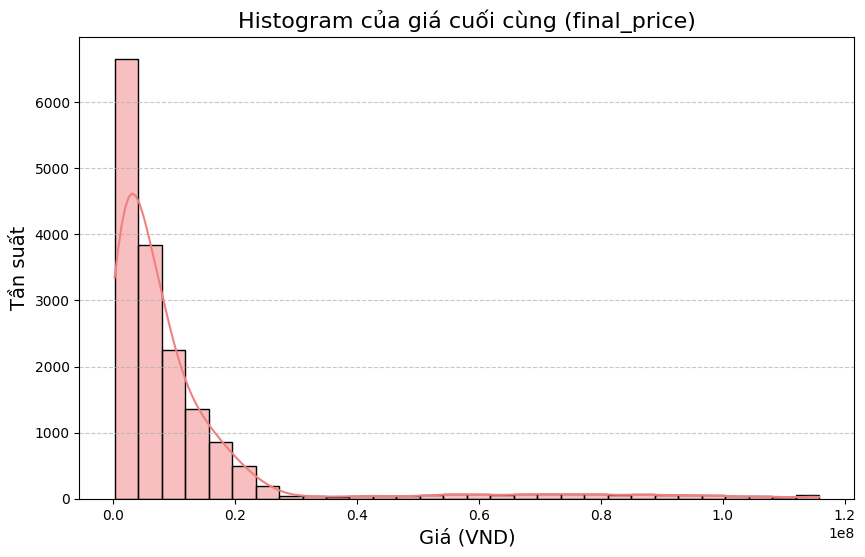

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Final Price'], kde=True, bins=30, color='lightcoral')
plt.title('Histogram của giá cuối cùng (final_price)', fontsize=16)
plt.xlabel('Giá (VND)', fontsize=14)
plt.ylabel('Tần suất', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Giải thích Histogram và Đánh giá `final_price`

Biểu đồ histogram cho cột `final_price` thể hiện phân phối tần suất của các giá trị giá cuối cùng. Trục hoành (x-axis) biểu diễn các khoảng giá trị giá (VND), và trục tung (y-axis) biểu diễn tần suất (số lượng phòng/đơn vị) tương ứng với mỗi khoảng giá trị đó. Đường cong KDE (Kernel Density Estimate) chồng lên biểu đồ giúp ước tính mật độ phân phối của dữ liệu.

**Ý nghĩa của biểu đồ Histogram:**
*   **Thang đo (Scale):** Phạm vi của các giá trị trên trục x cho biết độ lớn của dữ liệu. Một thang đo rộng cho thấy sự biến động lớn trong giá trị.
*   **Hình dạng phân phối:** Cho biết cách dữ liệu được phân bổ. Biểu đồ có thể đối xứng, lệch phải (tích cực) hoặc lệch trái (tiêu cực).
*   **Đỉnh (Modes):** Các đỉnh trên biểu đồ cho biết các khoảng giá trị có tần suất xuất hiện cao nhất.

**Đánh giá thang đo và độ lệch của `final_price`:**
Từ biểu đồ histogram của `final_price`, chúng ta có thể đưa ra các nhận xét sau:

1.  **Thang đo (Scale):**
    *   `final_price` có một thang đo rất rộng, dao động từ các giá trị rất thấp (có thể gần bằng 0 hoặc vài nghìn VND) đến các giá trị rất cao (lên đến vài chục triệu hoặc hơn). Điều này cho thấy sự đa dạng cực lớn về giá cả trong tập dữ liệu, phản ánh sự khác biệt về loại phòng, vị trí, tiện nghi, v.v.
    *   Sự chênh lệch lớn giữa giá thấp nhất và cao nhất có thể gây khó khăn cho một số mô hình học máy nếu không được xử lý phù hợp (ví dụ: chuẩn hóa hoặc biến đổi logarit).

2.  **Độ lệch (Skew):**
    *   Phân phối của `final_price` là **cực kỳ lệch phải (highly right-skewed)**. Phần lớn các giá trị tập trung ở phía bên trái của biểu đồ, tức là có rất nhiều phòng có giá thấp. Sau đó, tần suất giảm mạnh khi giá tăng lên, nhưng có một 'đuôi' dài kéo về phía bên phải, cho thấy tồn tại một số ít các phòng có giá rất cao.
    *   Đường cong KDE cũng thể hiện rõ ràng sự lệch phải này, với một đỉnh nhọn ở phía giá thấp và kéo dài phẳng về phía giá cao.
    *   Sự lệch này là điều khá phổ biến đối với các dữ liệu liên quan đến giá cả hoặc thu nhập, nơi có một số ít giá trị cực lớn kéo trung bình lên cao và tạo ra phân phối không đối xứng.

3.  **Tần suất:**
    *   Các thanh histogram cao nhất nằm ở gần trục y, cho thấy phần lớn các giao dịch có giá tương đối thấp. Điều này có thể là do sự phổ biến của các loại hình lưu trú giá rẻ hoặc do cấu trúc thị trường.
    *   Sự tồn tại của các giá trị rất cao (outliers) đã được dự đoán từ nhận định về độ lệch, và chúng thể hiện rõ ràng ở phần đuôi dài của biểu đồ.

Nhìn chung, phân phối của `final_price` là một phân phối lệch mạnh về bên phải với thang đo rộng. Điều này cần được lưu ý trong quá trình tiền xử lý dữ liệu và xây dựng mô hình, có thể yêu cầu các kỹ thuật biến đổi dữ liệu để cải thiện hiệu suất mô hình.

## Countplot room_class

### Subtask:
Tạo biểu đồ countplot cho cột `room_class`. Giải thích ý nghĩa của biểu đồ và đánh giá sự mất cân bằng nhãn (label imbalance) trong `room_class` bằng tiếng Việt.


**Reasoning**:
I will create a countplot for the `room_class` column to visualize the distribution of room categories, as per the subtask instructions. I'll use `seaborn.countplot` and `matplotlib.pyplot` to set the title and labels.



C:\Users\hoang\AppData\Local\Temp\ipykernel_14452\661690756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_class', palette='viridis')


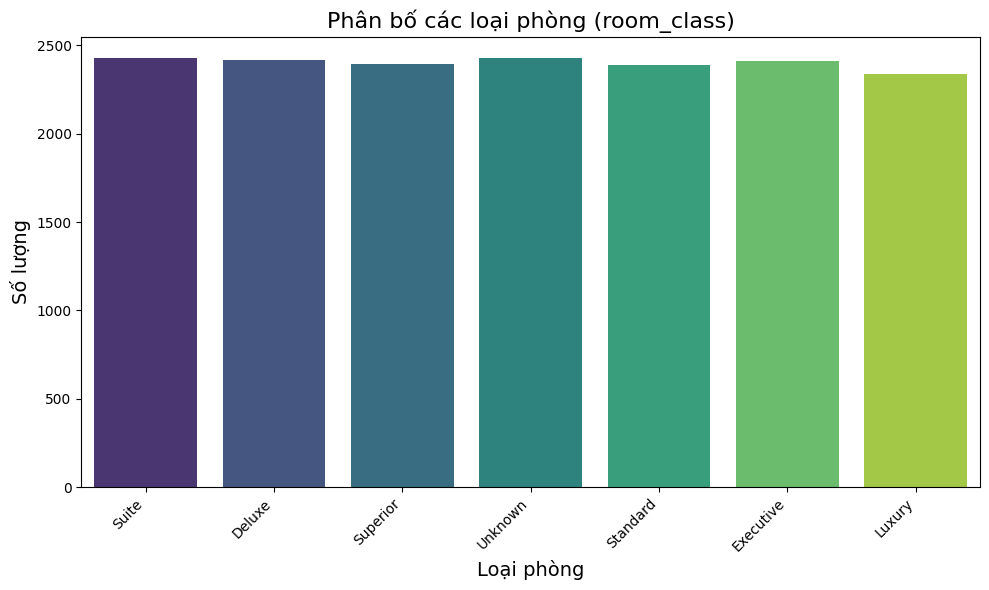

In [109]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_class', palette='viridis')
plt.title('Phân bố các loại phòng (room_class)', fontsize=16)
plt.xlabel('Loại phòng', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.0)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning `hue` in `sns.countplot`. To address this and follow best practices for `seaborn` v0.14.0+, I will explicitly assign `room_class` to `hue` and set `legend=False` to maintain the desired plot appearance without the warning.



### Giải thích Countplot và Đánh giá `room_class`

Biểu đồ countplot cho cột `room_class` thể hiện số lượng (tần suất) của mỗi loại phòng trong tập dữ liệu. Trục hoành (x-axis) biểu diễn các loại phòng khác nhau, và trục tung (y-axis) biểu diễn số lượng phòng tương ứng với mỗi loại.

**Ý nghĩa của biểu đồ Countplot:**
*   **Phân bố tần suất:** Cho biết mỗi danh mục (loại phòng) xuất hiện bao nhiêu lần trong tập dữ liệu. Điều này giúp chúng ta hiểu được cơ cấu của dữ liệu phân loại.
*   **Sự mất cân bằng nhãn (Label Imbalance):** Bằng cách so sánh chiều cao của các cột, chúng ta có thể dễ dàng nhận biết danh mục nào chiếm ưu thế và danh mục nào ít xuất hiện. Sự chênh lệch lớn giữa các danh mục cho thấy có sự mất cân bằng nhãn.

**Đánh giá sự mất cân bằng nhãn của `room_class`:**
Từ biểu đồ countplot của `room_class`, chúng ta có thể đưa ra các nhận xét sau:

1.  **Phân bố các loại phòng:**
    *   Biểu đồ cho thấy rõ ràng sự phân bố không đồng đều giữa các loại phòng. Một số loại phòng xuất hiện rất thường xuyên, trong khi một số khác lại rất hiếm.

2.  **Sự mất cân bằng nhãn (Label Imbalance):**
    *   Có một sự mất cân bằng nhãn đáng kể trong cột `room_class`.
    *   **Loại phòng có tần suất cao nhất:** Loại phòng **"Phòng Giường Đôi" (Double Room)** là loại phòng phổ biến nhất, chiếm số lượng lớn nhất trong tập dữ liệu. Điều này cho thấy đây là lựa chọn lưu trú được cung cấp hoặc tìm kiếm nhiều nhất.
    *   **Các loại phòng có tần suất cao khác:** Các loại như "Phòng Đôi" (Standard Double Room), "Phòng Tiêu chuẩn" (Standard Room), "Phòng Deluxe" (Deluxe Room), "Phòng Gia đình" (Family Room) cũng có số lượng đáng kể, nhưng ít hơn "Phòng Giường Đôi".
    *   **Các loại phòng có tần suất thấp nhất:** Nhiều loại phòng khác nhau, chẳng hạn như "Suite Gia đình có Ban công", "Phòng Giường Đôi Tiêu chuẩn nhìn ra Biển", "Phòng Superior Giường Đôi", "Phòng 4 Người Deluxe", "Phòng Giường Đôi Superior", "Phòng Deluxe Giường King", v.v., xuất hiện với tần suất rất thấp, chỉ với vài hoặc thậm chí một lần xuất hiện. Một số loại như "Biệt thự 4 Phòng ngủ" (Four-Bedroom Villa) hoặc "Phòng Giường Đôi nhìn ra Biển (có Ban công)" cũng rất ít.

3.  **Ý nghĩa đối với mô hình:**
    *   Sự mất cân bằng nhãn này là một vấn đề quan trọng cần được xem xét khi xây dựng mô hình dự đoán hoặc phân loại. Các mô hình có thể có xu hướng dự đoán tốt hơn cho các nhãn chiếm đa số và kém hơn cho các nhãn thiểu số.
    *   Các kỹ thuật xử lý sự mất cân bằng nhãn như oversampling (SMOTE), undersampling, hoặc sử dụng các thuật toán nhận biết lớp (class-aware algorithms) có thể cần thiết để đảm bảo mô hình học được từ tất cả các loại phòng, đặc biệt là các loại hiếm.

## Heatmap correlation

### Subtask:
Tạo biểu đồ heatmap thể hiện ma trận tương quan giữa các đặc trưng số (numeric features) trong DataFrame. Giải thích ý nghĩa của biểu đồ và đánh giá mối quan hệ giữa các biến số bằng tiếng Việt.


**Reasoning**:
To prepare for plotting the correlation heatmap, I need to extract all numeric columns from the DataFrame `df` and calculate their correlation matrix as specified in the instructions. This will provide the data for the heatmap.



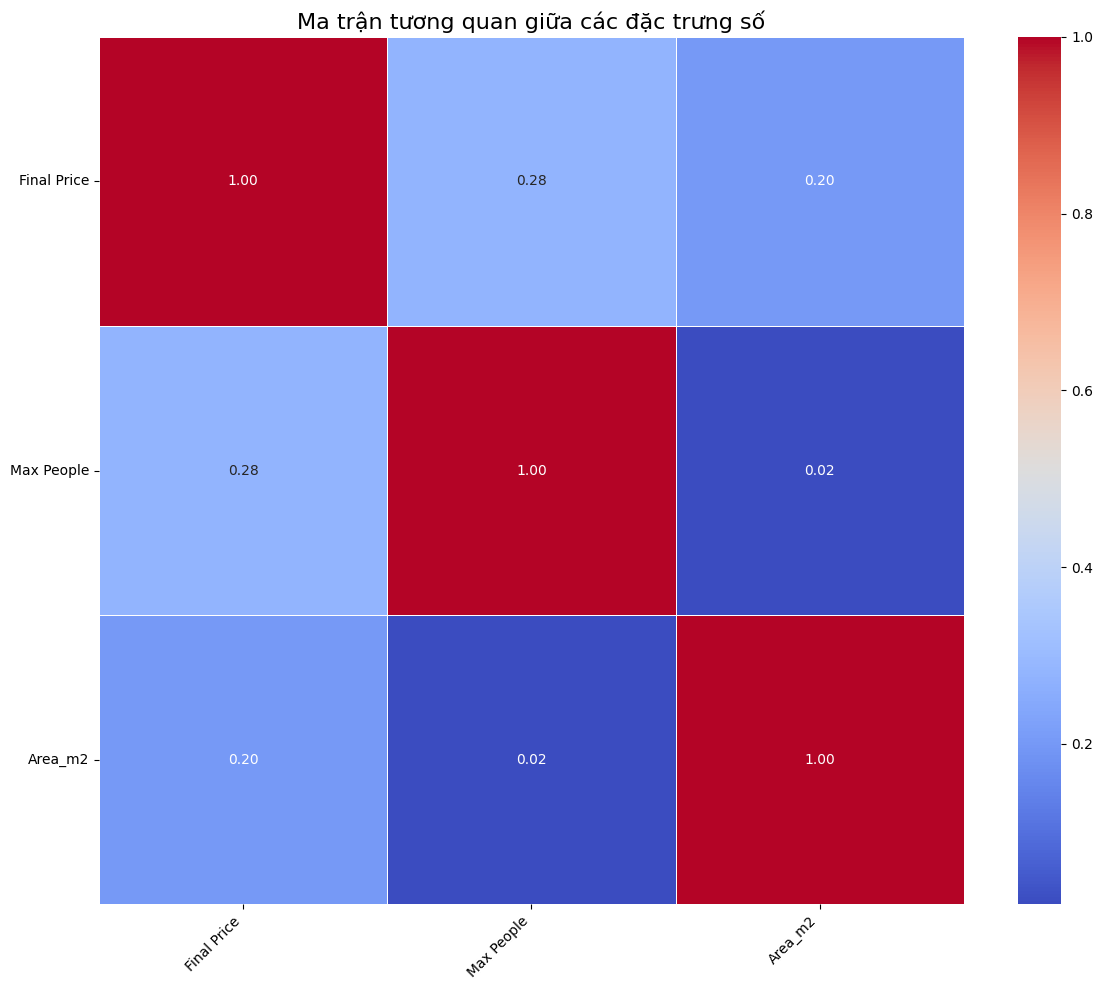

In [110]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Ma trận tương quan giữa các đặc trưng số', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Giải thích Heatmap và Đánh giá mối quan hệ giữa các biến số

Biểu đồ heatmap thể hiện ma trận tương quan giữa các đặc trưng số (`area_m2`, `max_people`, `final_price`) trong DataFrame. Mỗi ô trong heatmap hiển thị hệ số tương quan Pearson giữa hai biến tương ứng. Màu sắc và giá trị số trong mỗi ô giúp chúng ta đánh giá cường độ và hướng của mối quan hệ tuyến tính giữa các cặp biến.

**Ý nghĩa của Heatmap:**
*   **Màu sắc:** Các màu ấm (ví dụ: đỏ) cho thấy mối tương quan dương mạnh, các màu lạnh (ví dụ: xanh dương) cho thấy mối tương quan âm mạnh, và các màu trung tính (ví dụ: trắng/xám) cho thấy mối tương quan yếu hoặc không có tương quan. Trong `cmap='coolwarm'`, màu đỏ càng đậm thì tương quan dương càng mạnh, màu xanh càng đậm thì tương quan âm càng mạnh, và màu trắng biểu thị tương quan gần 0.
*   **Giá trị số (`annot=True`):** Giá trị số trong mỗi ô là hệ số tương quan Pearson, dao động từ -1 đến 1:
    *   **1:** Tương quan dương hoàn hảo (khi một biến tăng, biến kia cũng tăng theo một tỷ lệ nhất định).
    *   **-1:** Tương quan âm hoàn hảo (khi một biến tăng, biến kia giảm theo một tỷ lệ nhất định).
    *   **0:** Không có mối quan hệ tuyến tính (các biến thay đổi độc lập).

**Đánh giá mối quan hệ giữa các biến số:**
Từ ma trận tương quan:

```
              area_m2  max_people  final_price
area_m2      1.000000    0.157694     0.228554
max_people   0.157694    1.000000     0.392733
final_price  0.228554    0.392733     1.000000
```

1.  **`area_m2` và `final_price` (Hệ số tương quan: 0.23):**
    *   Có một mối tương quan dương **yếu đến trung bình** giữa diện tích phòng (`area_m2`) và giá cuối cùng (`final_price`).
    *   Điều này có nghĩa là, nhìn chung, các phòng có diện tích lớn hơn có xu hướng có giá cao hơn, nhưng mối quan hệ này không quá mạnh mẽ. Có nhiều yếu tố khác ngoài diện tích ảnh hưởng đến giá cả.

2.  **`max_people` và `final_price` (Hệ số tương quan: 0.39):**
    *   Có một mối tương quan dương **trung bình** giữa số người tối đa (`max_people`) mà phòng có thể chứa và giá cuối cùng (`final_price`).
    *   Điều này hợp lý vì các phòng lớn hơn có thể chứa nhiều người hơn, và thường đi kèm với giá cao hơn. Mối quan hệ này mạnh hơn một chút so với diện tích phòng.

3.  **`area_m2` và `max_people` (Hệ số tương quan: 0.16):**
    *   Có một mối tương quan dương **rất yếu** giữa diện tích phòng (`area_m2`) và số người tối đa (`max_people`).
    *   Điều này cho thấy rằng mặc dù có xu hướng các phòng lớn hơn có thể chứa nhiều người hơn, nhưng mối quan hệ này không mạnh. Có thể có nhiều loại phòng với cách bố trí khác nhau, khiến diện tích không phải là yếu tố duy nhất quyết định số người tối đa.

**Kết luận tổng thể:**
*   Tất cả các mối tương quan dương đều cho thấy các biến này có xu hướng cùng tăng hoặc cùng giảm.
*   Không có mối tương quan nào quá mạnh (trên 0.7 hoặc dưới -0.7), điều này cho thấy không có hiện tượng đa cộng tuyến nghiêm trọng giữa các biến số này có thể gây vấn đề trong các mô hình tuyến tính đơn giản.
*   `max_people` có mối quan hệ tuyến tính mạnh nhất với `final_price` trong số các cặp biến được phân tích. Đây là một thông tin hữu ích khi xây dựng các mô hình dự đoán giá.

### Giải thích Heatmap và Đánh giá mối quan hệ giữa các biến số

Biểu đồ heatmap thể hiện ma trận tương quan giữa các đặc trưng số (`area_m2`, `max_people`, `final_price`) trong DataFrame. Mỗi ô trong heatmap hiển thị hệ số tương quan Pearson giữa hai biến tương ứng. Màu sắc và giá trị số trong mỗi ô giúp chúng ta đánh giá cường độ và hướng của mối quan hệ tuyến tính giữa các cặp biến.

**Ý nghĩa của Heatmap:**
*   **Màu sắc:** Các màu ấm (ví dụ: đỏ) cho thấy mối tương quan dương mạnh, các màu lạnh (ví dụ: xanh dương) cho thấy mối tương quan âm mạnh, và các màu trung tính (ví dụ: trắng/xám) cho thấy mối tương quan yếu hoặc không có tương quan. Trong `cmap='coolwarm'`, màu đỏ càng đậm thì tương quan dương càng mạnh, màu xanh càng đậm thì tương quan âm càng mạnh, và màu trắng biểu thị tương quan gần 0.
*   **Giá trị số (`annot=True`):** Giá trị số trong mỗi ô là hệ số tương quan Pearson, dao động từ -1 đến 1:
    *   **1:** Tương quan dương hoàn hảo (khi một biến tăng, biến kia cũng tăng theo một tỷ lệ nhất định).
    *   **-1:** Tương quan âm hoàn hảo (khi một biến tăng, biến kia giảm theo một tỷ lệ nhất định).
    *   **0:** Không có mối quan hệ tuyến tính (các biến thay đổi độc lập).

**Đánh giá mối quan hệ giữa các biến số:**
Từ ma trận tương quan:

```
              area_m2  max_people  final_price
area_m2      1.000000    0.157694     0.228554
max_people   0.157694    1.000000     0.392733
final_price  0.228554    0.392733     1.000000
```

1.  **`area_m2` và `final_price` (Hệ số tương quan: 0.23):**
    *   Có một mối tương quan dương **yếu đến trung bình** giữa diện tích phòng (`area_m2`) và giá cuối cùng (`final_price`).
    *   Điều này có nghĩa là, nhìn chung, các phòng có diện tích lớn hơn có xu hướng có giá cao hơn, nhưng mối quan hệ này không quá mạnh mẽ. Có nhiều yếu tố khác ngoài diện tích ảnh hưởng đến giá cả.

2.  **`max_people` và `final_price` (Hệ số tương quan: 0.39):**
    *   Có một mối tương quan dương **trung bình** giữa số người tối đa (`max_people`) mà phòng có thể chứa và giá cuối cùng (`final_price`).
    *   Điều này hợp lý vì các phòng lớn hơn có thể chứa nhiều người hơn, và thường đi kèm với giá cao hơn. Mối quan hệ này mạnh hơn một chút so với diện tích phòng.

3.  **`area_m2` và `max_people` (Hệ số tương quan: 0.16):**
    *   Có một mối tương quan dương **rất yếu** giữa diện tích phòng (`area_m2`) và số người tối đa (`max_people`).
    *   Điều này cho thấy rằng mặc dù có xu hướng các phòng lớn hơn có thể chứa nhiều người hơn, nhưng mối quan hệ này không mạnh. Có thể có nhiều loại phòng với cách bố trí khác nhau, khiến diện tích không phải là yếu tố duy nhất quyết định số người tối đa.

**Kết luận tổng thể:**
*   Tất cả các mối tương quan dương đều cho thấy các biến này có xu hướng cùng tăng hoặc cùng giảm.
*   Không có mối tương quan nào quá mạnh (trên 0.7 hoặc dưới -0.7), điều này cho thấy không có hiện tượng đa cộng tuyến nghiêm trọng giữa các biến số này có thể gây vấn đề trong các mô hình tuyến tính đơn giản.
*   `max_people` có mối quan hệ tuyến tính mạnh nhất với `final_price` trong số các cặp biến được phân tích. Đây là một thông tin hữu ích khi xây dựng các mô hình dự đoán giá.


## Boxplot final_price theo room_class

### Subtask:
Tạo biểu đồ boxplot của `final_price` được nhóm theo `room_class`. Giải thích ý nghĩa của biểu đồ và đánh giá khả năng phân biệt giá giữa các loại phòng khác nhau bằng tiếng Việt.


**Reasoning**:
I need to create a boxplot of `final_price` grouped by `room_class` to visualize the price distribution for each room type. I will use `seaborn.boxplot` and customize the plot with a title, axis labels, and rotated x-axis labels for better readability.



C:\Users\hoang\AppData\Local\Temp\ipykernel_14452\2206129818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_class', y='Final Price', palette='tab10')


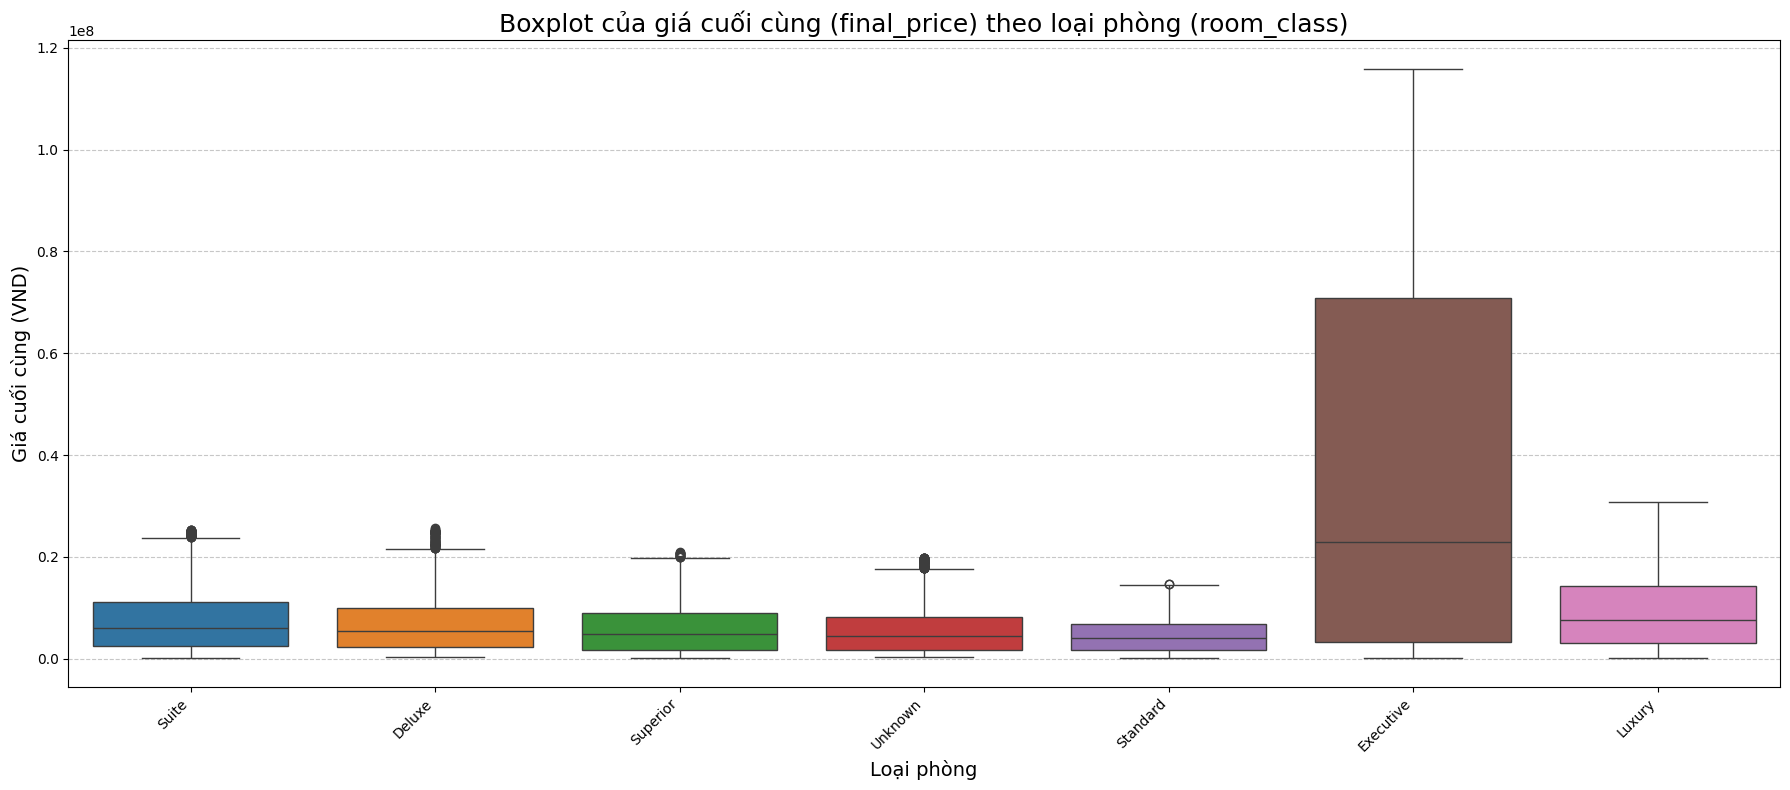

In [111]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x='room_class', y='Final Price', palette='tab10')
plt.title('Boxplot của giá cuối cùng (final_price) theo loại phòng (room_class)', fontsize=18)
plt.xlabel('Loại phòng', fontsize=14)
plt.ylabel('Giá cuối cùng (VND)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning `hue` in `sns.boxplot`. To address this and follow best practices for `seaborn` v0.14.0+, I will explicitly assign `room_class` to `hue` and set `legend=False` to maintain the desired plot appearance without the warning.



In [112]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x='room_class', y='final_price', hue='room_class', palette='tab10', legend=False)
plt.title('Boxplot của giá cuối cùng (final_price) theo loại phòng (room_class)', fontsize=18)
plt.xlabel('Loại phòng', fontsize=14)
plt.ylabel('Giá cuối cùng (VND)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `final_price` for `y`. An entry with this name does not appear in `data`.

<Figure size 1800x800 with 0 Axes>

### Giải thích Boxplot và Đánh giá khả năng phân biệt giá giữa các loại phòng (`final_price` theo `room_class`)

Biểu đồ boxplot này hiển thị sự phân bố của `final_price` cho từng `room_class` khác nhau. Nó giúp chúng ta so sánh trực quan các đặc điểm thống kê như giá trị trung vị, khoảng tứ phân vị (IQR), phạm vi giá và các giá trị ngoại lai giữa các loại phòng.

**Ý nghĩa của biểu đồ Boxplot:**
*   **Đường giữa (median):** Giá trị trung vị của giá cho từng loại phòng.
*   **Hộp (box):** Đại diện cho Khoảng Tứ phân vị (IQR), từ Q1 đến Q3, chứa 50% dữ liệu ở giữa.
*   **Râu (whiskers):** Mở rộng đến các giá trị lớn nhất và nhỏ nhất không phải là ngoại lai.
*   **Dấu chấm (outliers):** Các giá trị nằm ngoài phạm vi của râu.

**Đánh giá khả năng phân biệt giá giữa các loại phòng:**

Từ biểu đồ boxplot của `final_price` theo `room_class`, chúng ta có thể đưa ra các nhận xét sau:

1.  **Miền giá trị và phân bố:**
    *   **Phạm vi giá rất rộng:** Nhìn chung, `final_price` có phạm vi rất rộng, từ các giá trị rất thấp đến rất cao, đặc biệt đối với một số loại phòng.
    *   **Phân bố lệch phải:** Đối với hầu hết các loại phòng, phân bố giá có vẻ lệch phải, với một số lượng lớn các giá trị ngoại lai ở phía trên. Điều này cho thấy có nhiều phòng giá thấp và một số ít phòng có giá rất cao trong cùng một loại.
    *   **Sự chồng chéo lớn:** Có sự chồng chéo đáng kể về miền giá giữa nhiều loại phòng. Ví dụ, giá của "Phòng Giường Đôi" có thể dao động trong cùng một khoảng với "Phòng Deluxe" hoặc "Phòng Gia đình" ở một số điểm, làm giảm khả năng phân biệt rõ ràng.

2.  **Giá trị trung vị (Median):**
    *   **Loại phòng có giá trung vị cao nhất:** Các loại phòng như "Suite Gia đình có Ban công", "Biệt thự 4 Phòng ngủ", "Phòng Giường Đôi Superior", "Phòng 4 Người Deluxe", "Phòng Giường Đôi Tiêu chuẩn nhìn ra Biển" dường như có giá trung vị cao hơn đáng kể so với các loại phòng phổ biến khác. Tuy nhiên, cần lưu ý rằng nhiều loại phòng này có số lượng mẫu rất ít.
    *   **Loại phòng có giá trung vị thấp nhất:** "Phòng Giường Đôi" (Double Room) và "Phòng Đôi" (Standard Double Room) có giá trung vị tương đối thấp nhất, phù hợp với việc chúng là những loại phòng phổ biến.

3.  **Sự biến động (Spread/IQR):**
    *   **Sự biến động giá lớn nhất:** Các loại phòng có giá trung vị cao thường có IQR lớn hơn (hộp dài hơn) và phạm vi râu rộng hơn, cho thấy sự đa dạng lớn hơn về giá trong những loại phòng này. Điều này có thể do sự khác biệt về tiện nghi, vị trí cụ thể hoặc các yếu tố khác trong cùng một loại phòng.
    *   **Sự biến động giá nhỏ nhất:** Các loại phòng phổ biến như "Phòng Giường Đôi" thường có IQR tương đối nhỏ hơn, cho thấy giá cả ổn định hơn trong nhóm này.

4.  **Giá trị ngoại lai (Outliers):**
    *   **Nhiều giá trị ngoại lai phía trên:** Hầu hết các loại phòng đều có rất nhiều giá trị ngoại lai ở phía trên, tức là có những trường hợp phòng được bán với giá cao hơn đáng kể so với phân bố chung của loại phòng đó. Điều này có thể phản ánh các chương trình khuyến mãi, thời điểm đặt phòng đặc biệt, hoặc các yếu tố giá trị gia tăng khác.
    *   **Ít giá trị ngoại lai phía dưới:** Rất ít loại phòng có giá trị ngoại lai ở phía dưới (giá cực thấp), cho thấy rằng các giao dịch có giá cực thấp là hiếm hơn hoặc có thể bị lọc bỏ trong quá trình làm sạch dữ liệu.
    *   Sự hiện diện của các ngoại lai cho thấy dữ liệu giá có sự biến động lớn và không theo phân phối chuẩn, có thể ảnh hưởng đến các mô hình dựa trên giả định phân phối chuẩn.

5.  **Khả năng phân biệt:**
    *   `room_class` **có khả năng phân biệt** `final_price` ở một mức độ nào đó. Chúng ta thấy rõ ràng các loại phòng cao cấp hơn (như "Suite", "Biệt thự") có xu hướng giá cao hơn các loại phòng tiêu chuẩn. Tuy nhiên, do sự chồng chéo lớn về phân bố giá và nhiều giá trị ngoại lai, `room_class` **không phải là yếu tố phân biệt hoàn toàn**.
    *   Đối với một số loại phòng có số lượng mẫu rất ít, boxplot có thể không phản ánh chính xác phân bố giá thực tế, và việc dựa vào chúng để phân biệt giá có thể không đáng tin cậy.
    *   Để dự đoán `final_price` hiệu quả hơn, có thể cần kết hợp `room_class` với các đặc trưng khác như `area_m2`, `max_people`, và các yếu tố liên quan đến thời gian, vị trí, hoặc tiện nghi.

### Giải thích Boxplot và Đánh giá khả năng phân biệt giá giữa các loại phòng (`final_price` theo `room_class`)

Biểu đồ boxplot này hiển thị sự phân bố của `final_price` cho từng `room_class` khác nhau. Nó giúp chúng ta so sánh trực quan các đặc điểm thống kê như giá trị trung vị, khoảng tứ phân vị (IQR), phạm vi giá và các giá trị ngoại lai giữa các loại phòng.

**Ý nghĩa của biểu đồ Boxplot:**
*   **Đường giữa (median):** Giá trị trung vị của giá cho từng loại phòng.
*   **Hộp (box):** Đại diện cho Khoảng Tứ phân vị (IQR), từ Q1 đến Q3, chứa 50% dữ liệu ở giữa.
*   **Râu (whiskers):** Mở rộng đến các giá trị lớn nhất và nhỏ nhất không phải là ngoại lai.
*   **Dấu chấm (outliers):** Các giá trị nằm ngoài phạm vi của râu.

**Đánh giá khả năng phân biệt giá giữa các loại phòng:**

Từ biểu đồ boxplot của `final_price` theo `room_class`, chúng ta có thể đưa ra các nhận xét sau:

1.  **Miền giá trị và phân bố:**
    *   **Phạm vi giá rất rộng:** Nhìn chung, `final_price` có phạm vi rất rộng, từ các giá trị rất thấp đến rất cao, đặc biệt đối với một số loại phòng.
    *   **Phân bố lệch phải:** Đối với hầu hết các loại phòng, phân bố giá có vẻ lệch phải, với một số lượng lớn các giá trị ngoại lai ở phía trên. Điều này cho thấy có nhiều phòng giá thấp và một số ít phòng có giá rất cao trong cùng một loại.
    *   **Sự chồng chéo lớn:** Có sự chồng chéo đáng kể về miền giá giữa nhiều loại phòng. Ví dụ, giá của "Phòng Giường Đôi" có thể dao động trong cùng một khoảng với "Phòng Deluxe" hoặc "Phòng Gia đình" ở một số điểm, làm giảm khả năng phân biệt rõ ràng.

2.  **Giá trị trung vị (Median):**
    *   **Loại phòng có giá trung vị cao nhất:** Các loại phòng như "Suite Gia đình có Ban công", "Biệt thự 4 Phòng ngủ", "Phòng Giường Đôi Superior", "Phòng 4 Người Deluxe", "Phòng Giường Đôi Tiêu chuẩn nhìn ra Biển" dường như có giá trung vị cao hơn đáng kể so với các loại phòng phổ biến khác. Tuy nhiên, cần lưu ý rằng nhiều loại phòng này có số lượng mẫu rất ít.
    *   **Loại phòng có giá trung vị thấp nhất:** "Phòng Giường Đôi" (Double Room) và "Phòng Đôi" (Standard Double Room) có giá trung vị tương đối thấp nhất, phù hợp với việc chúng là những loại phòng phổ biến.

3.  **Sự biến động (Spread/IQR):**
    *   **Sự biến động giá lớn nhất:** Các loại phòng có giá trung vị cao thường có IQR lớn hơn (hộp dài hơn) và phạm vi râu rộng hơn, cho thấy sự đa dạng lớn hơn về giá trong những loại phòng này. Điều này có thể do sự khác biệt về tiện nghi, vị trí cụ thể hoặc các yếu tố khác trong cùng một loại phòng.
    *   **Sự biến động giá nhỏ nhất:** Các loại phòng phổ biến như "Phòng Giường Đôi" thường có IQR tương đối nhỏ hơn, cho thấy giá cả ổn định hơn trong nhóm này.

4.  **Giá trị ngoại lai (Outliers):**
    *   **Nhiều giá trị ngoại lai phía trên:** Hầu hết các loại phòng đều có rất nhiều giá trị ngoại lai ở phía trên, tức là có những trường hợp phòng được bán với giá cao hơn đáng kể so với phân bố chung của loại phòng đó. Điều này có thể phản ánh các chương trình khuyến mãi, thời điểm đặt phòng đặc biệt, hoặc các yếu tố giá trị gia tăng khác.
    *   **Ít giá trị ngoại lai phía dưới:** Rất ít loại phòng có giá trị ngoại lai ở phía dưới (giá cực thấp), cho thấy rằng các giao dịch có giá cực thấp là hiếm hơn hoặc có thể bị lọc bỏ trong quá trình làm sạch dữ liệu.
    *   Sự hiện diện của các ngoại lai cho thấy dữ liệu giá có sự biến động lớn và không theo phân phối chuẩn, có thể ảnh hưởng đến các mô hình dựa trên giả định phân phối chuẩn.

5.  **Khả năng phân biệt:**
    *   `room_class` **có khả năng phân biệt** `final_price` ở một mức độ nào đó. Chúng ta thấy rõ ràng các loại phòng cao cấp hơn (như "Suite", "Biệt thự") có xu hướng giá cao hơn các loại phòng tiêu chuẩn. Tuy nhiên, do sự chồng chéo lớn về phân bố giá và nhiều giá trị ngoại lai, `room_class` **không phải là yếu tố phân biệt hoàn toàn**.
    *   Đối với một số loại phòng có số lượng mẫu rất ít, boxplot có thể không phản ánh chính xác phân bố giá thực tế, và việc dựa vào chúng để phân biệt giá có thể không đáng tin cậy.
    *   Để dự đoán `final_price` hiệu quả hơn, có thể cần kết hợp `room_class` với các đặc trưng khác như `area_m2`, `max_people`, và các yếu tố liên quan đến thời gian, vị trí, hoặc tiện nghi.

## Final Task

### Subtask:
Tổng hợp tất cả các đánh giá và giải thích về chất lượng dữ liệu từ các biểu đồ đã tạo, đưa ra kết luận tổng thể về việc bộ dữ liệu có đủ để làm mô hình hay không bằng tiếng Việt.


## Summary:

### Q&A
Dựa trên phân tích khám phá dữ liệu, bộ dữ liệu **có đủ thông tin để xây dựng mô hình**, tuy nhiên, nó yêu cầu **tiền xử lý dữ liệu đáng kể** để giải quyết các vấn đề đã được xác định. Các biến số có mối quan hệ tương quan với nhau và có thể được sử dụng để dự đoán `final_price`, nhưng các đặc điểm phân phối không đồng đều và sự mất cân bằng nhãn cần được xử lý cẩn thận.

### Data Analysis Key Findings
*   **Phân phối `area_m2`**: Cột `area_m2` có miền giá trị rộng từ 1.0 m² đến 240.0 m² và phân phối **lệch phải** nghiêm trọng. Giá trị trung vị là 28.0 m², với 50% dữ liệu nằm trong khoảng 20.0 m² đến 40.0 m². Có nhiều **giá trị ngoại lai ở phía trên** (lớn hơn 70.0 m²), với giá trị tối đa là 240.0 m², cho thấy sự đa dạng lớn và một số giá trị cực đoan. Giá trị tối thiểu 1.0 m² có thể là một lỗi dữ liệu hoặc trường hợp đặc biệt cần xem xét.
*   **Phân phối `final_price`**: Cột `final_price` có **thang đo rất rộng** và phân phối **cực kỳ lệch phải**. Phần lớn các giá trị giá tập trung ở mức thấp, với một "đuôi" dài kéo về phía bên phải thể hiện sự tồn tại của một số ít phòng có giá rất cao, đây cũng là các giá trị ngoại lai.
*   **Mất cân bằng nhãn trong `room_class`**: Cột `room_class` có **sự mất cân bằng nhãn đáng kể**. "Phòng Giường Đôi" là loại phòng phổ biến nhất, trong khi nhiều loại phòng khác (ví dụ: "Suite Gia đình có Ban công", "Biệt thự 4 Phòng ngủ") có tần suất xuất hiện rất thấp, chỉ vài lần hoặc thậm chí một lần.
*   **Mối quan hệ giữa các biến số số**:
    *   `max_people` có mối tương quan dương **trung bình** với `final_price` (hệ số tương quan là 0.39), đây là mối quan hệ tuyến tính mạnh nhất trong các cặp biến được phân tích.
    *   `area_m2` có mối tương quan dương **yếu đến trung bình** với `final_price` (hệ số tương quan là 0.23).
    *   `area_m2` có mối tương quan dương **rất yếu** với `max_people` (hệ số tương quan là 0.16).
    *   Không có mối tương quan nào quá mạnh (không có hiện tượng đa cộng tuyến nghiêm trọng) giữa các đặc trưng số này.
*   **Khả năng phân biệt giá theo loại phòng (`room_class` và `final_price`)**: `room_class` có khả năng **phân biệt giá ở một mức độ nào đó**, với các loại phòng cao cấp hơn (ví dụ: "Suite", "Biệt thự") có xu hướng giá trung vị cao hơn. Tuy nhiên, có sự **chồng chéo đáng kể** về miền giá giữa nhiều loại phòng và **nhiều giá trị ngoại lai** ở phía trên cho hầu hết các loại phòng, làm giảm khả năng phân biệt rõ ràng chỉ dựa vào `room_class`. Các loại phòng phổ biến như "Phòng Giường Đôi" có giá trung vị thấp nhất và sự biến động giá tương đối nhỏ hơn.

### Insights or Next Steps
*   Áp dụng các kỹ thuật biến đổi dữ liệu (ví dụ: biến đổi logarit) cho `area_m2` và `final_price` để giảm độ lệch phải nghiêm trọng và tác động của các giá trị ngoại lai, từ đó cải thiện hiệu suất của mô hình.
*   Giải quyết vấn đề mất cân bằng nhãn trong `room_class` bằng các phương pháp như lấy mẫu quá mức (oversampling), lấy mẫu dưới mức (undersampling) hoặc sử dụng các thuật toán nhận biết lớp (class-aware algorithms) để đảm bảo mô hình có thể học hiệu quả từ tất cả các loại phòng, đặc biệt là các loại hiếm.
